In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from matplotlib.colors import Normalize
from sklearn.datasets import fetch_openml

In [2]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [3]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}'):
    nsamples = sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))

    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples / 6.0), 6, index + 1)
        plt.axis('off')
        # each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

In [4]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}'):
    nsamples = sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))

    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples / 6.0), 6, index + 1)
        plt.axis('off')
        # each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

In [5]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [6]:
def plot_param_space_heatmap(scores, C_range, gamma_range):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.jet,
               norm=MidpointNormalize(vmin=0.5, midpoint=0.9))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()

In [7]:
def plot_param_space_bubble(scores, x_range, y_range):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    
    # Change color with c and alpha. I map the color to the X axis value.
    plt.scatter(x_range, y_range, s=scores*2000, c=scores, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)


    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.colorbar()
    # plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    # plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')
    plt.show()


In [8]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(1, figsize=(15, 12), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [9]:
# it creates mldata folder in your root project folder
mnist = fetch_openml('mnist_784', version=1)

# minist object contains: data, COL_NAMES, DESCR, target fields
# you can check it by running
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

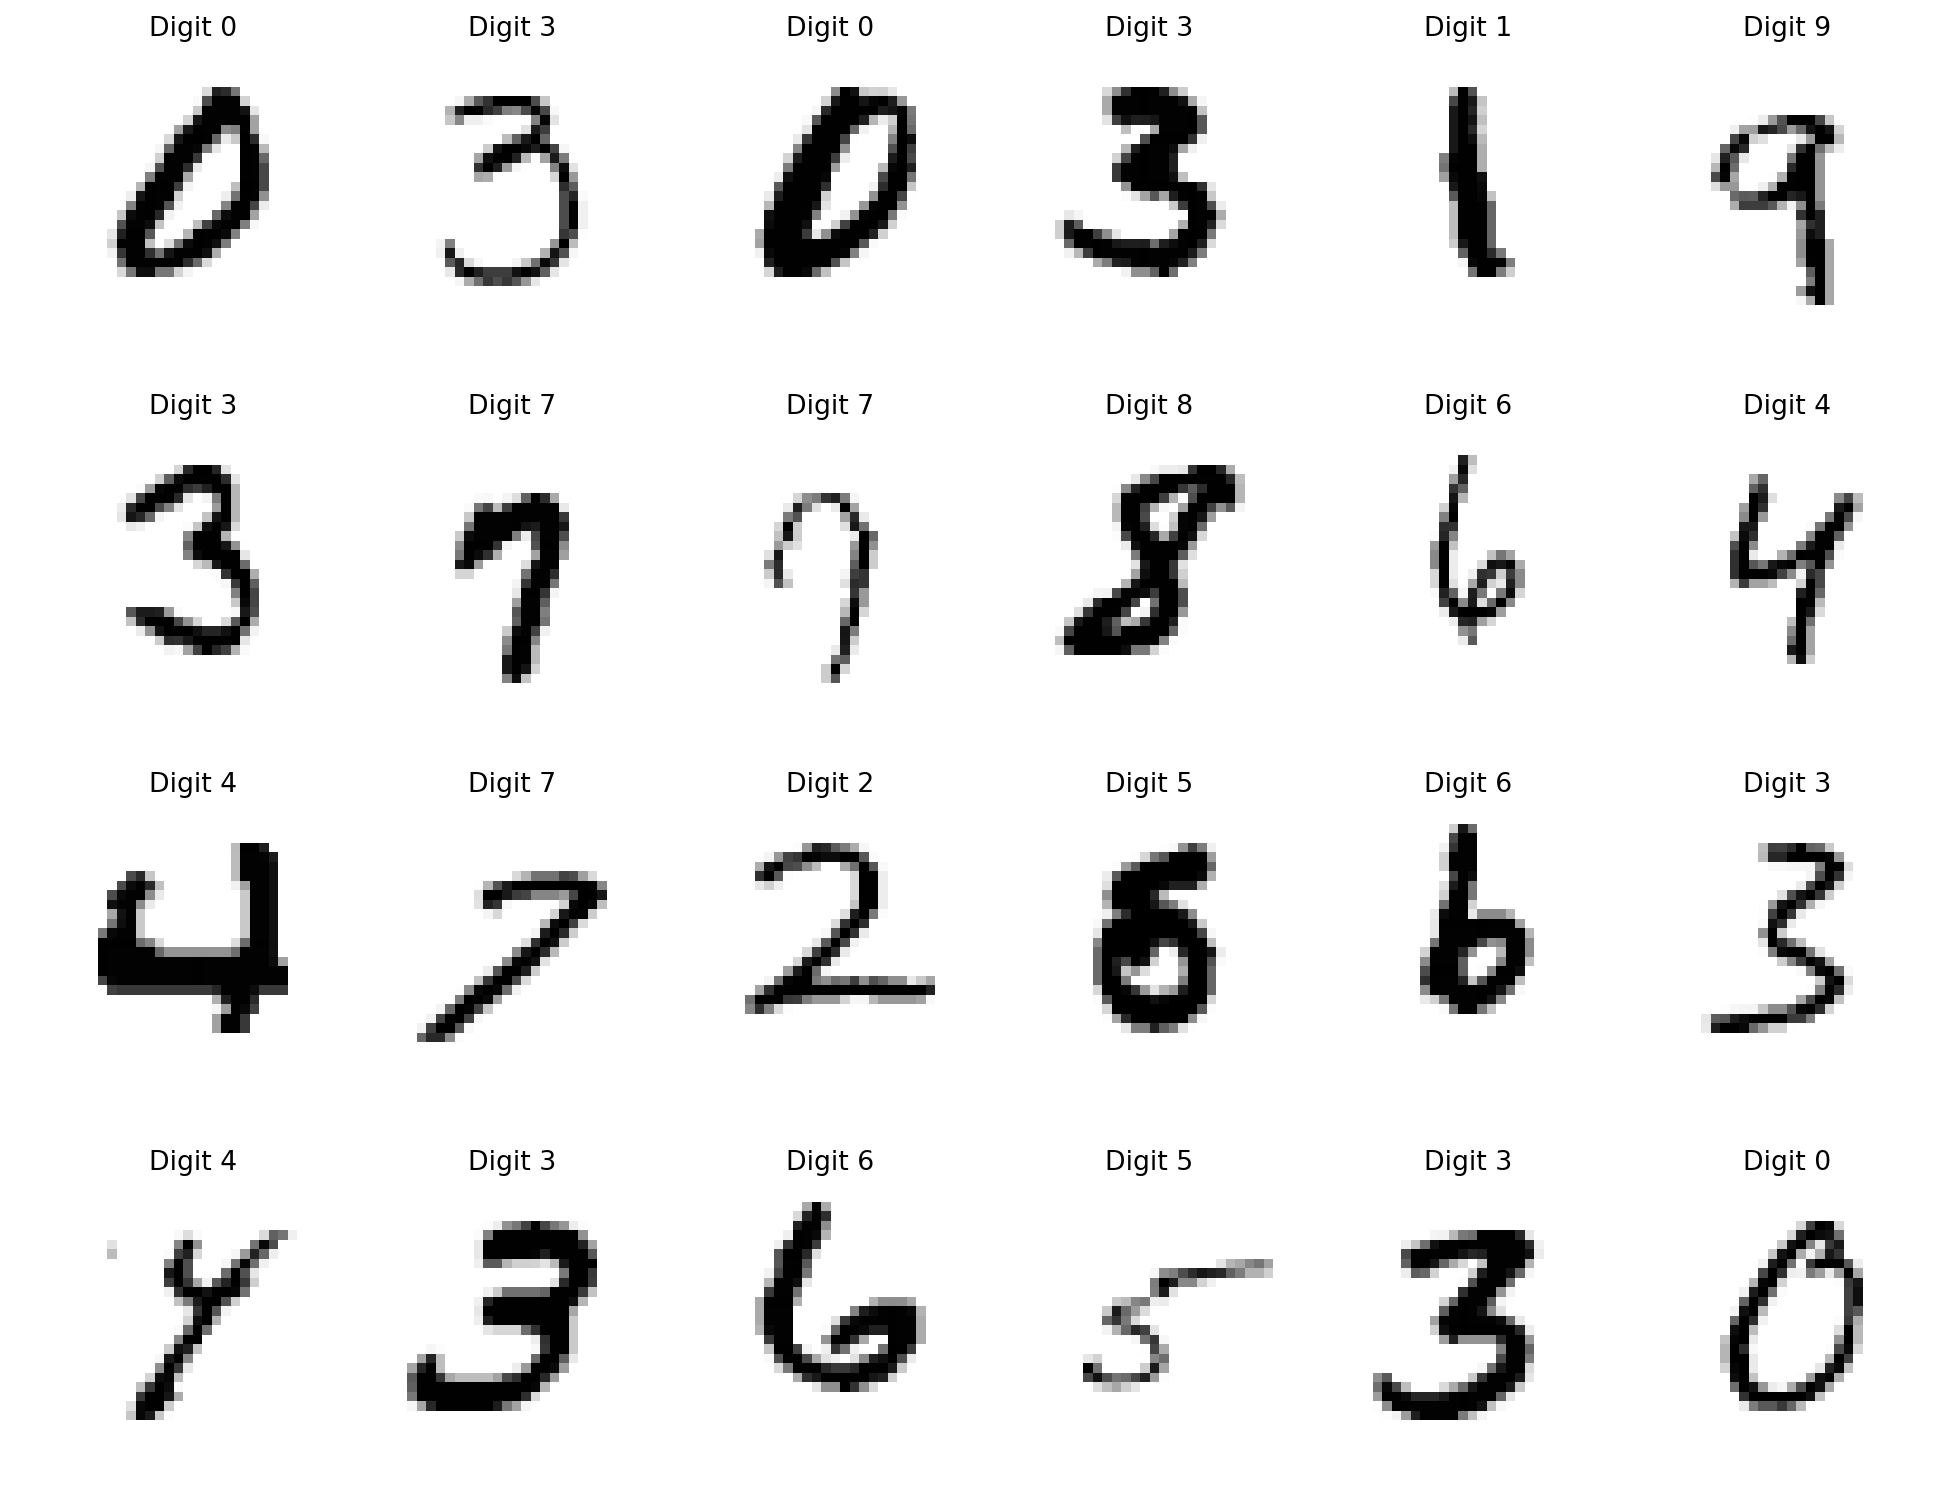

In [10]:
images = mnist.data
targets = mnist.target

# Let's have a look at the random 16 images,
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

# pick  random indexes from 0 to size of our dataset
show_some_digits(images, targets)

In [11]:
# ---------------- classification begins -----------------
# scale data for [0,255] -> [0,1]
# sample smaller size for testing
# rand_idx = np.random.choice(images.shape[0],10000)
# X_data =images[rand_idx]/255.0
# Y      = targets[rand_idx]

# full dataset classification
X_data = images / 255.0
Y = targets

# split data to train and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [13]:
################ Classifier with good params ###########
# Create a classifier: a support vector classifier

param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C, gamma=param_gamma)

# We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now()
print('Stop learning {}'.format(str(end_time)))
elapsed_time = end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

#Saving the trained model
from sklearn.externals import joblib
joblib.dump(classifier, 'svm_model')

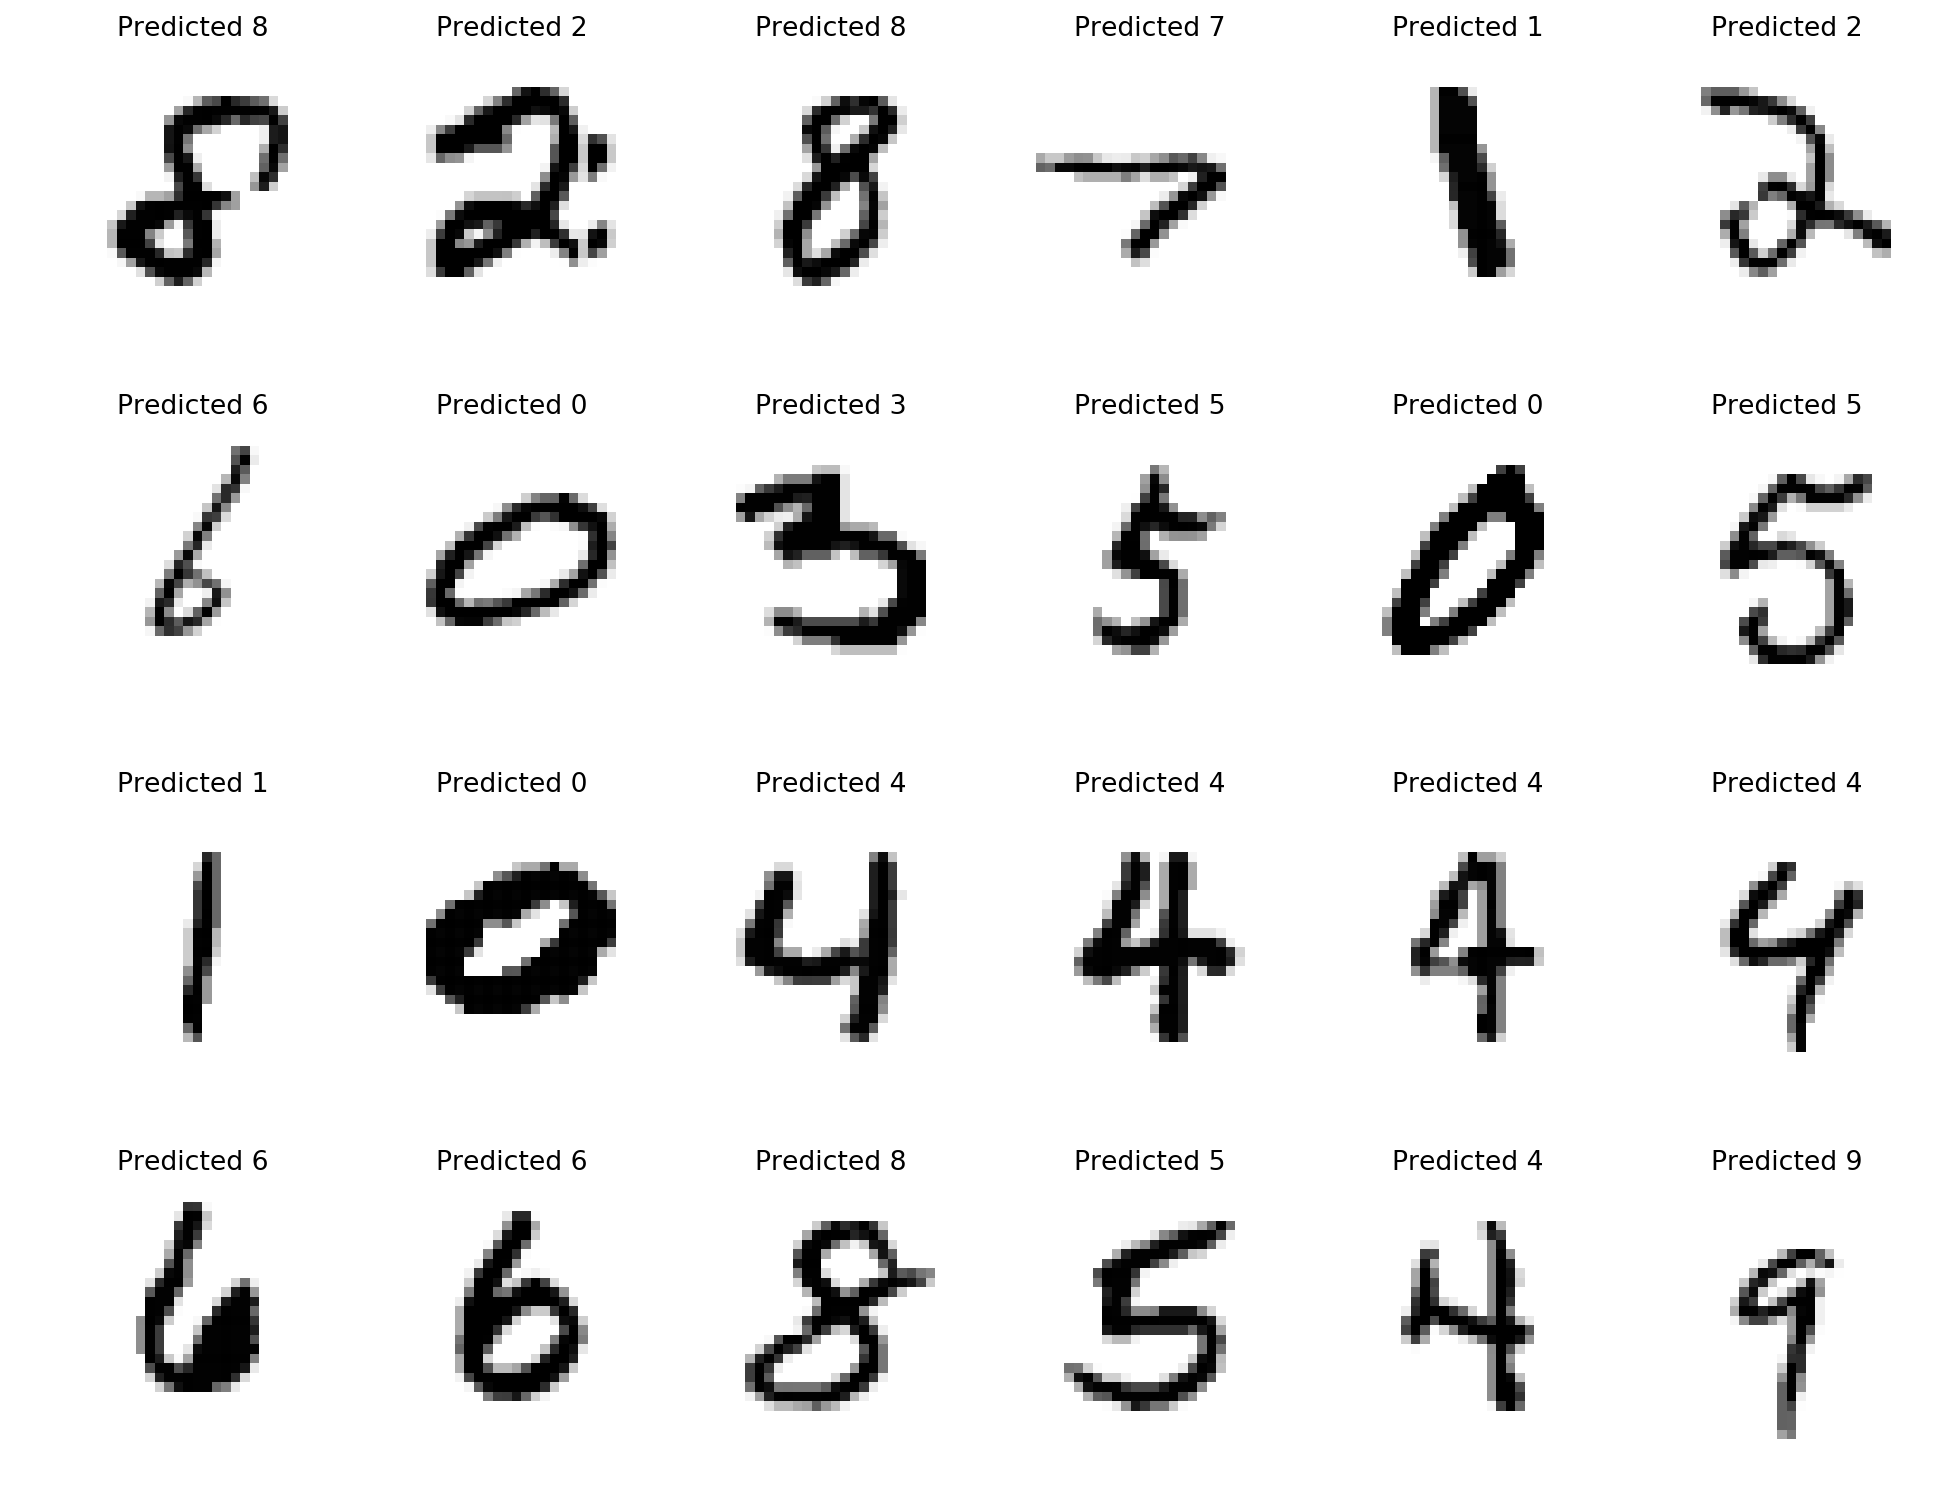

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.99      0.99      0.99      1205
           2       0.96      0.99      0.98      1019
           3       0.98      0.97      0.98      1081
           4       0.98      0.99      0.98       968
           5       0.99      0.98      0.99       970
           6       0.99      0.99      0.99      1009
           7       0.98      0.99      0.98      1110
           8       0.98      0.97      0.98      1016
           9       0.98      0.97      0.98      1087

   micro avg       0.98      0.98      0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98    

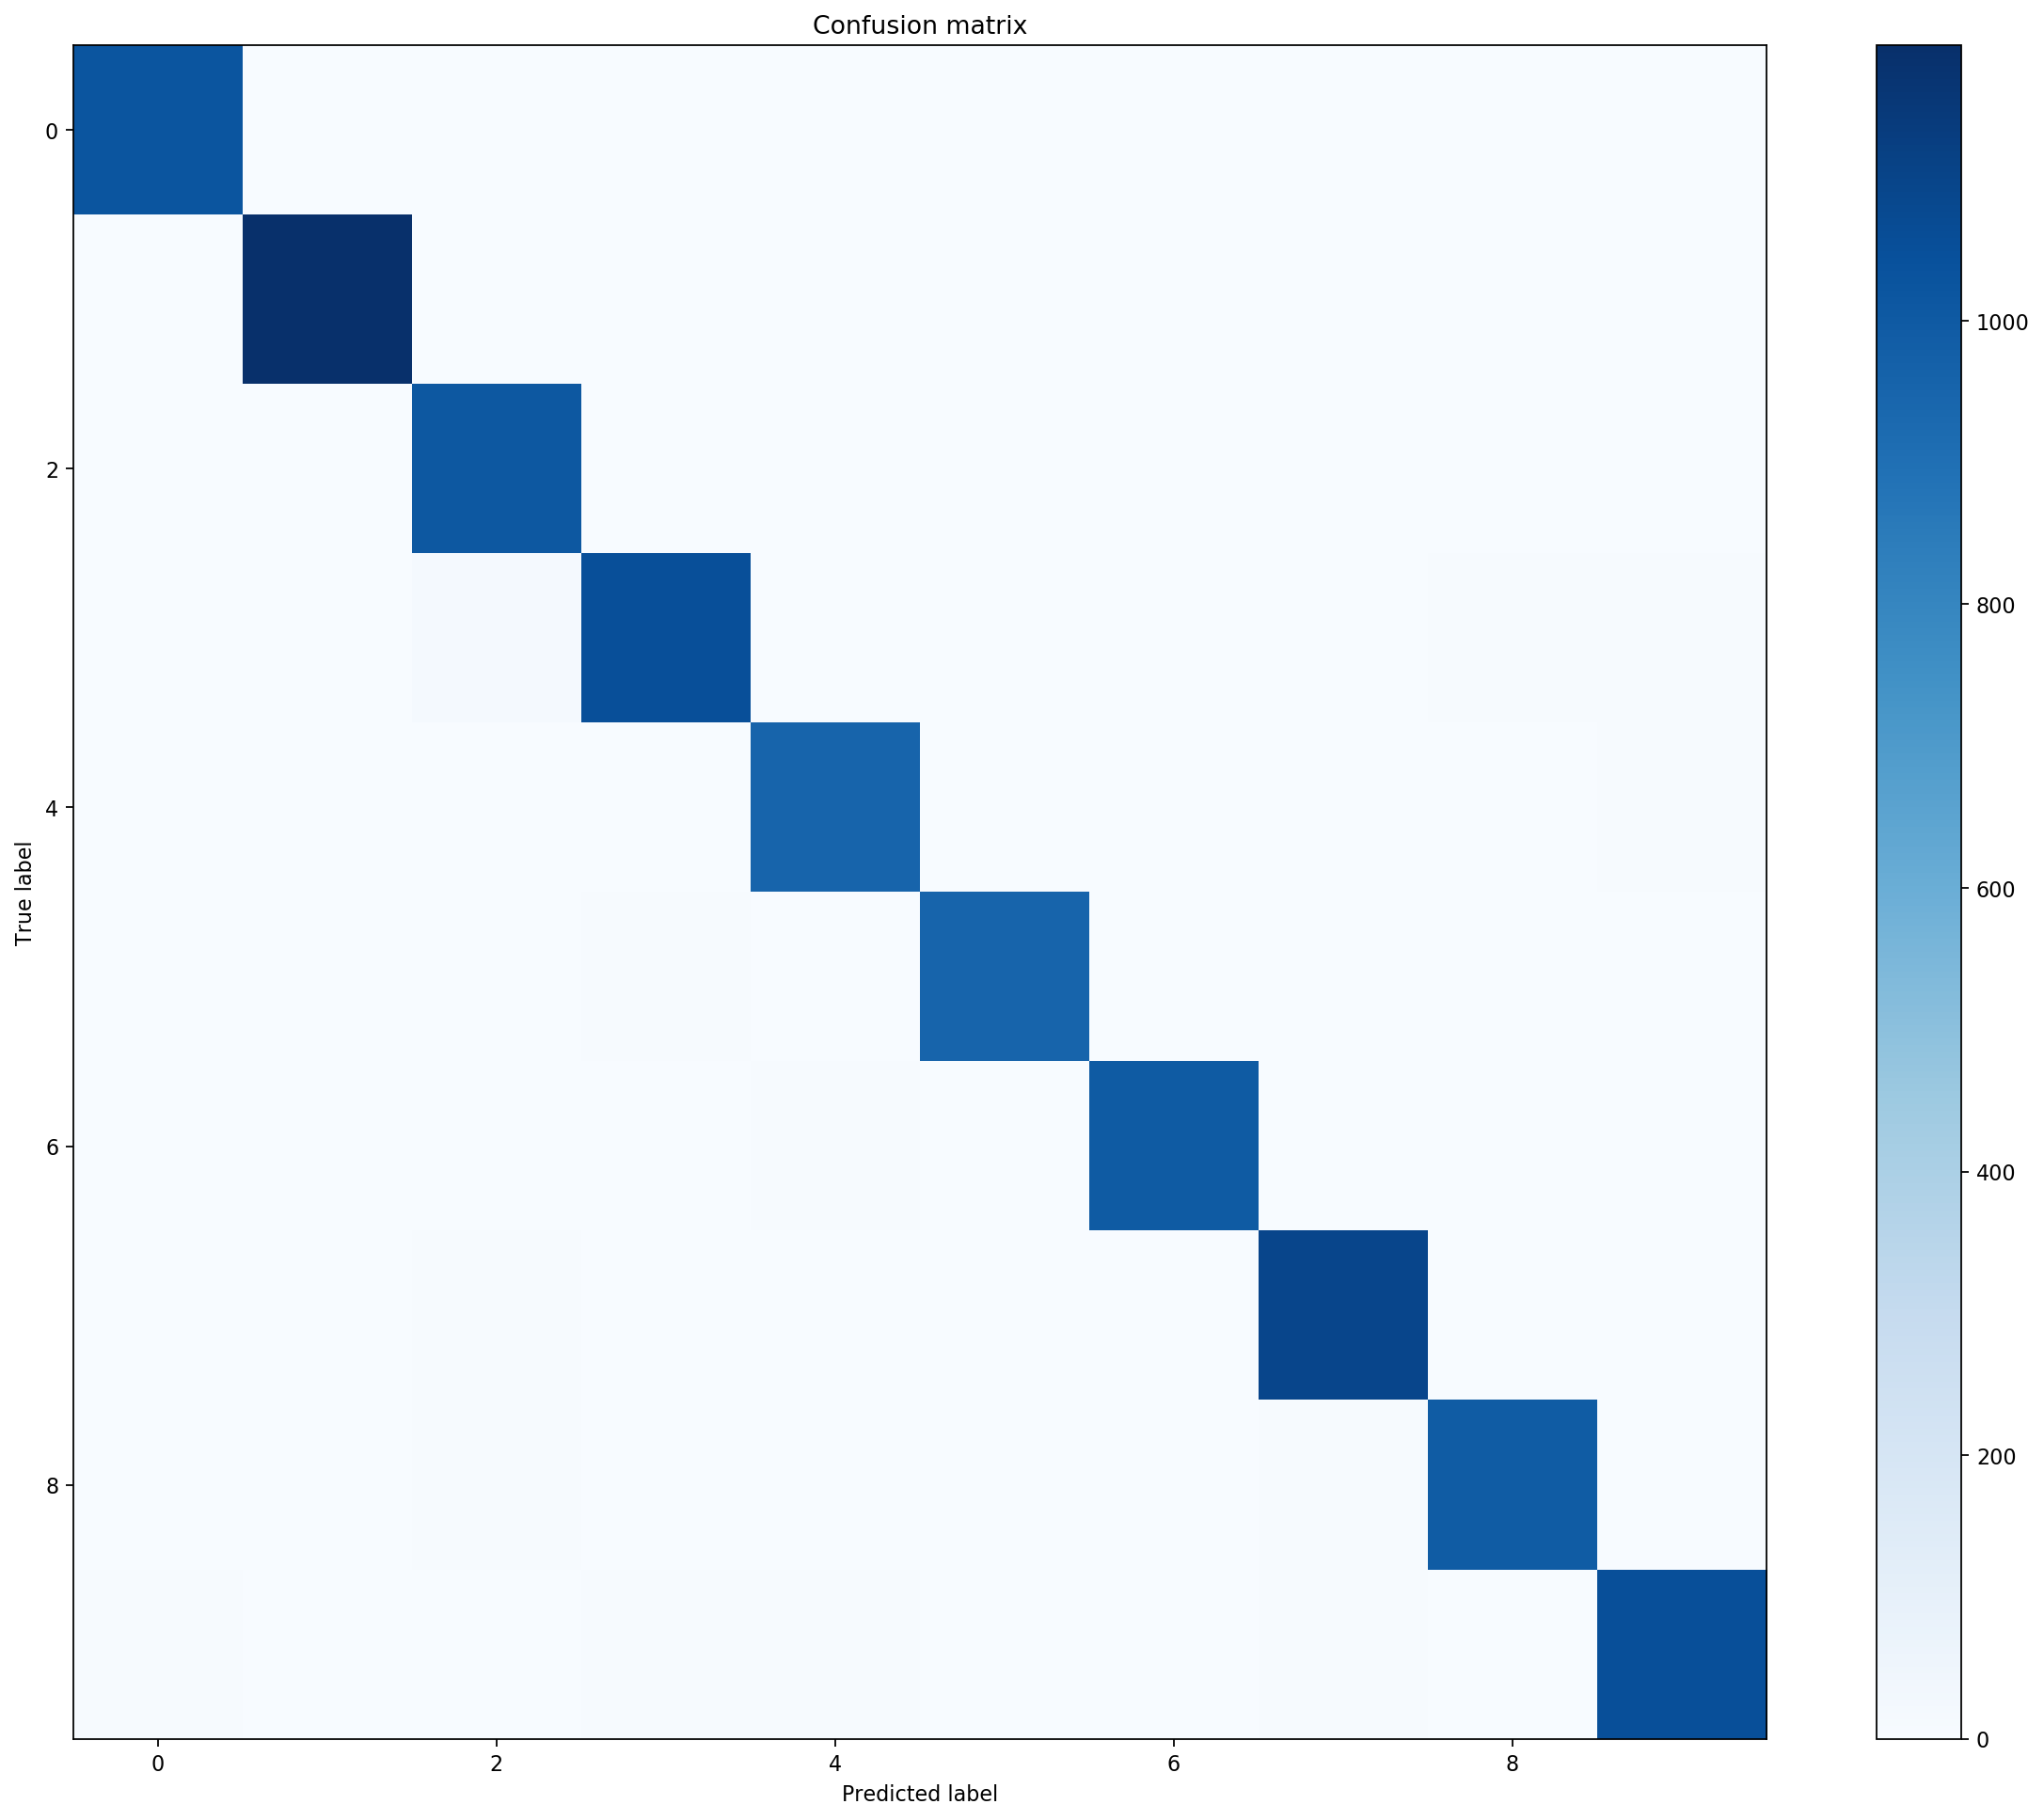

Accuracy=0.9830476190476191


In [15]:
from sklearn.externals import joblib
#loading the trained model
classifier = joblib.load('svm_model')

########################################################
# Now predict the value of the test
expected = y_test
predicted = classifier.predict(X_test)

show_some_digits(X_test, predicted, title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

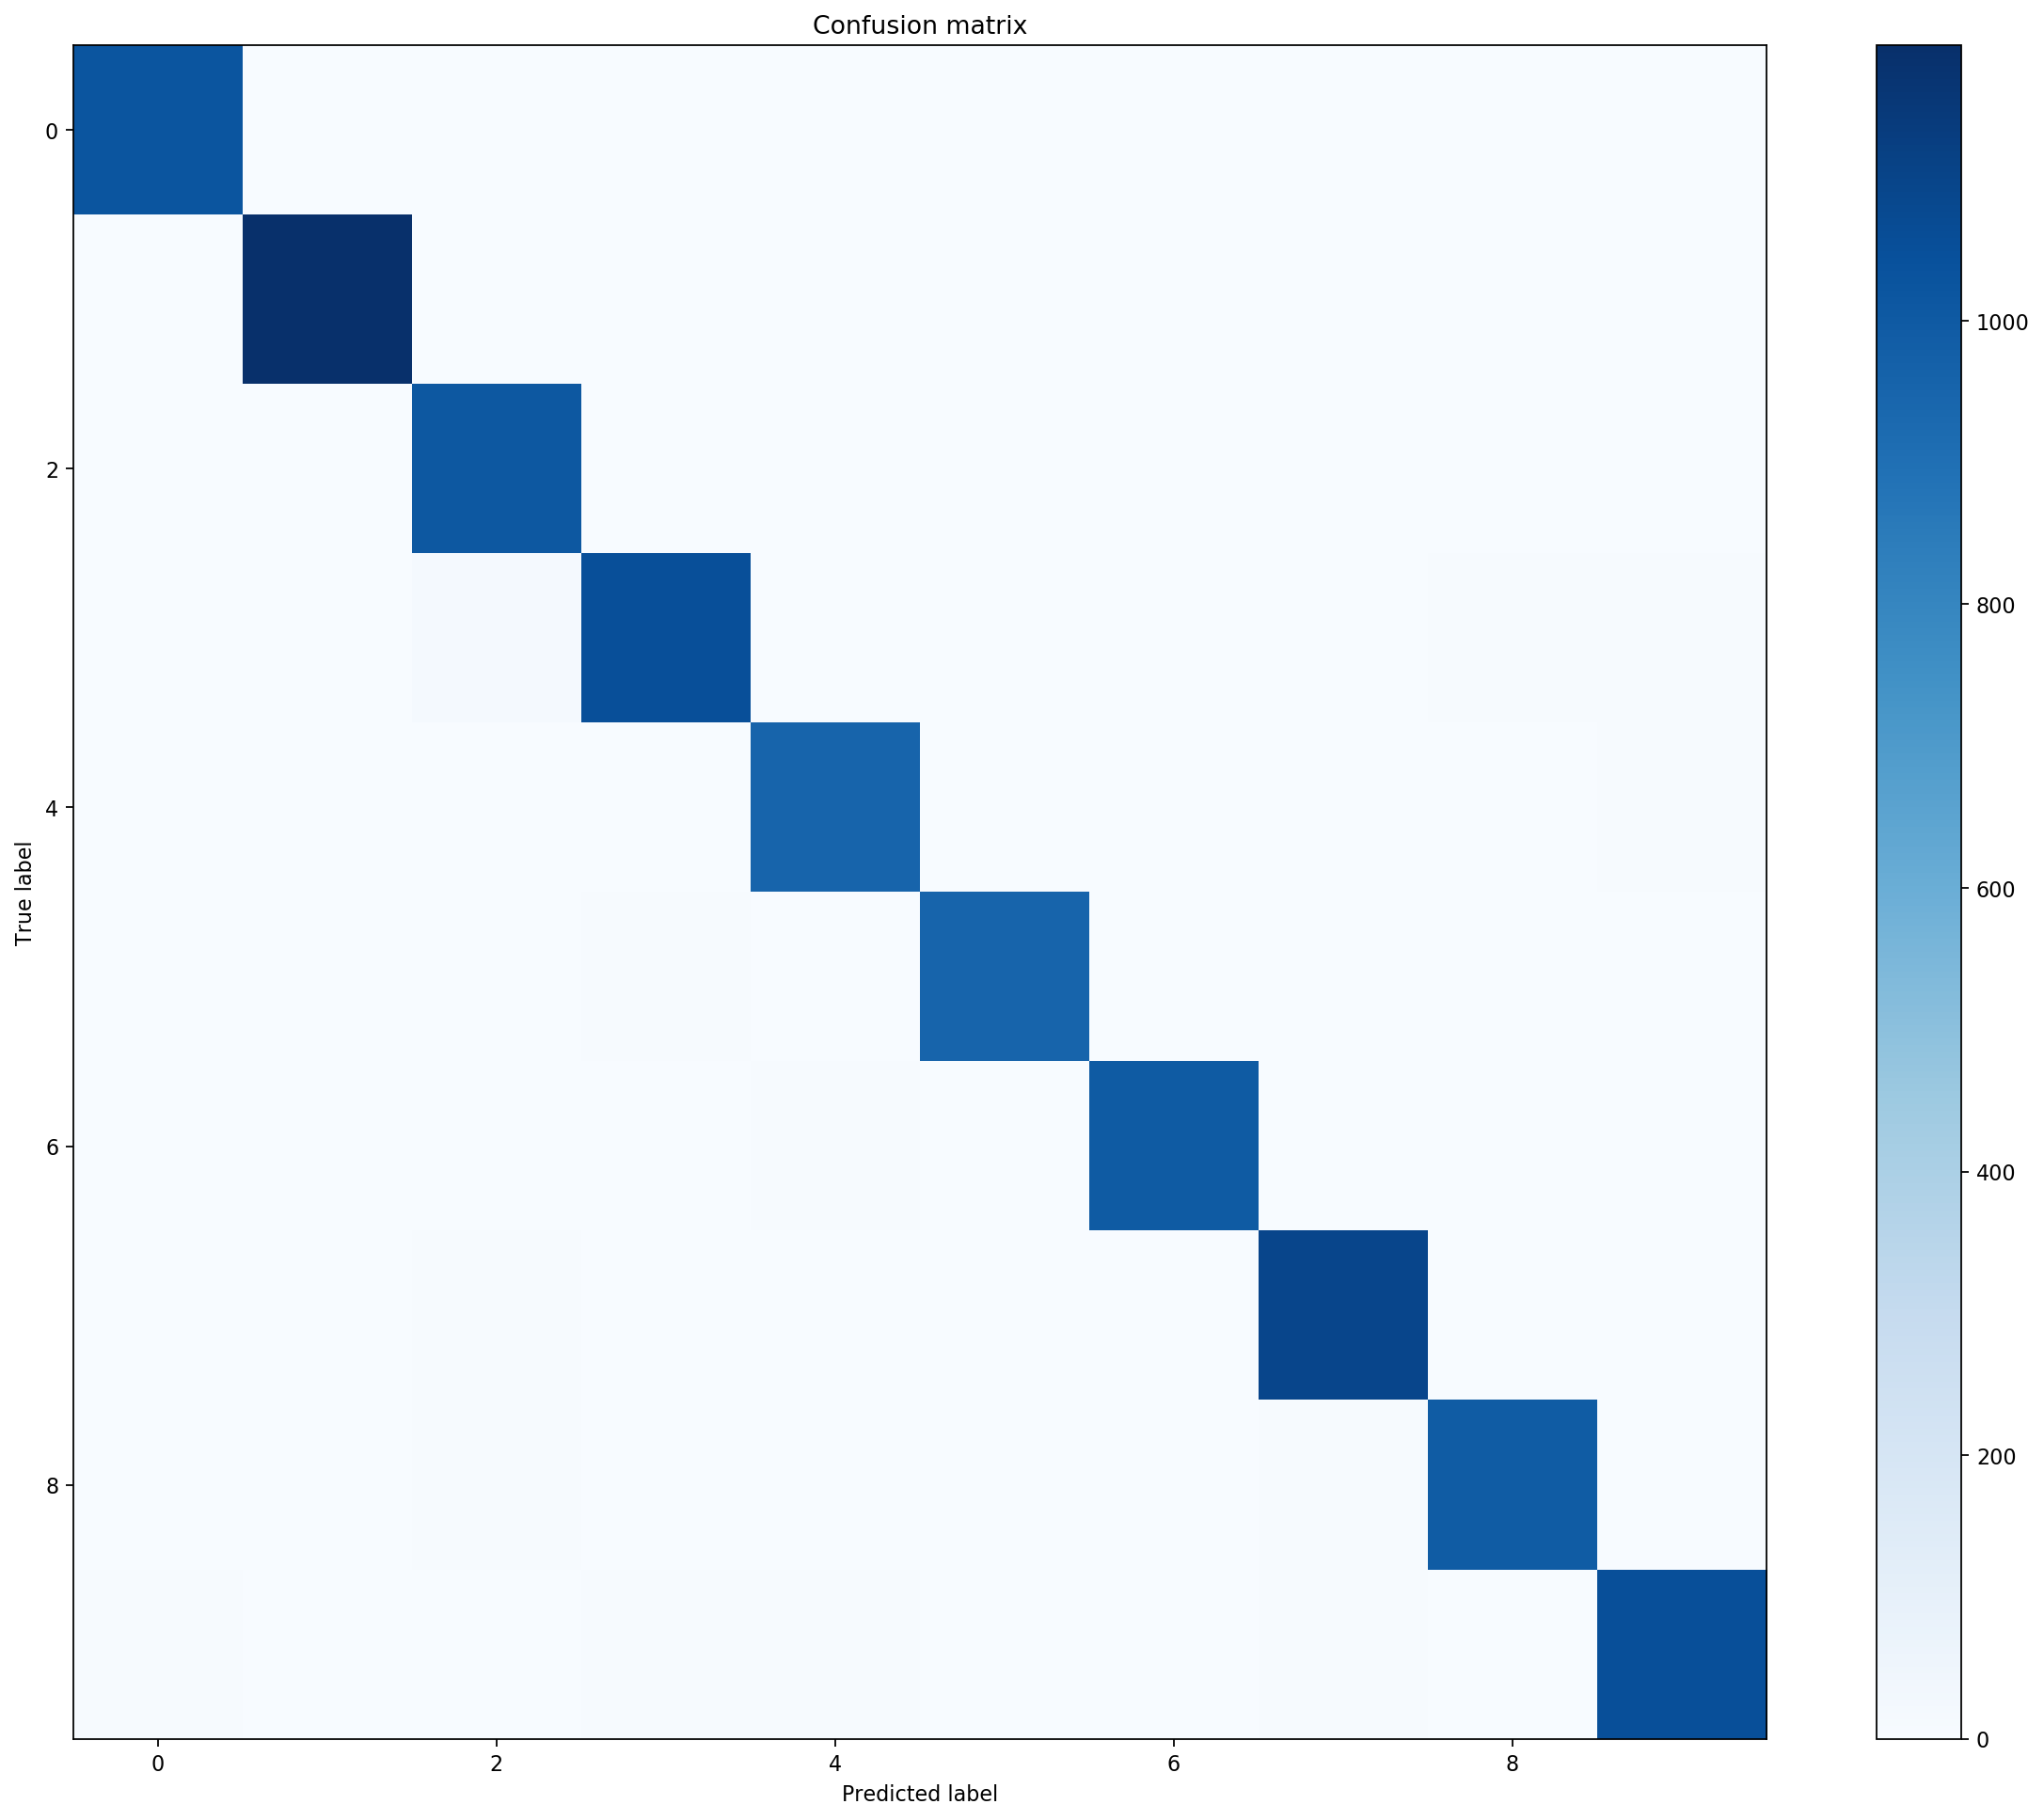

Accuracy=0.9830476190476191


In [16]:
plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

In [17]:
test_data = X_test[734]

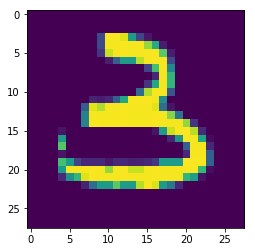

In [20]:
test_data = test_data.reshape(28,28)
plt.imshow(test_data)

The Number is 3 and Let's See What Our Model Predicts

In [23]:
print("The predicted number is: " ,classifier.predict(X_test[734].reshape(1,-1)))

The predicted number is:  ['3']
